# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [46]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('C:/Users/grundyt/Documents/GA/Week 3/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [40]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()


In [5]:
# show the first review
yelp['text'].ix[0]


'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [4]:
# convert the list of dictionaries to a DataFrame


In [ ]:
# add DataFrame columns for cool, useful, and funny


In [ ]:
# drop the votes column and then display the head


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [47]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
feature_cols = ['cool','useful','funny']
x = yelp[feature_cols]
y = yelp.stars
x.shape

(10000, 3)

In [64]:
yelp.groupby('cool').stars.mean()

cool
0     3.725914
1     3.832225
2     3.922563
3     3.825758
4     3.870813
5     3.932773
6     3.806818
7     3.634146
8     4.064516
9     4.266667
10    4.000000
11    4.411765
12    3.444444
13    4.071429
14    4.400000
15    4.000000
16    4.333333
17    4.200000
18    3.000000
19    5.000000
20    4.000000
21    4.000000
22    4.000000
23    5.000000
27    5.000000
28    5.000000
32    5.000000
38    4.000000
77    5.000000
Name: stars, dtype: float64

In [65]:
yelp.groupby('useful').stars.mean()

useful
0     3.836320
1     3.775632
2     3.727135
3     3.732771
4     3.686567
5     3.527027
6     3.394737
7     3.637363
8     3.596154
9     3.473684
10    3.620690
11    4.210526
12    3.800000
13    3.916667
14    3.500000
15    4.294118
16    4.666667
17    3.800000
18    4.400000
19    3.500000
20    3.000000
23    4.000000
24    5.000000
28    5.000000
30    5.000000
31    5.000000
38    4.000000
76    5.000000
Name: stars, dtype: float64

In [66]:
yelp.groupby('funny').stars.mean()


funny
0     3.849137
1     3.661765
2     3.550580
3     3.557196
4     3.571429
5     3.577778
6     3.308824
7     3.676471
8     3.440000
9     3.428571
10    3.888889
11    3.571429
12    3.181818
13    2.666667
14    3.333333
15    4.200000
16    4.400000
17    2.500000
18    5.000000
19    3.000000
20    3.400000
21    1.000000
22    4.000000
23    5.000000
24    4.000000
27    4.000000
30    1.000000
39    5.000000
57    4.000000
Name: stars, dtype: float64

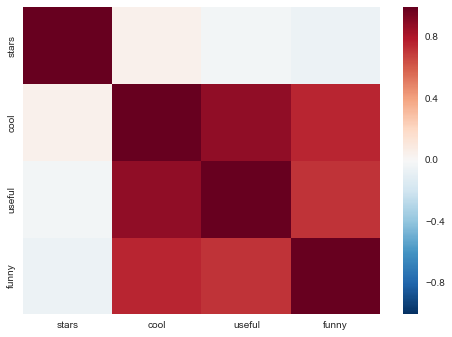

In [49]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

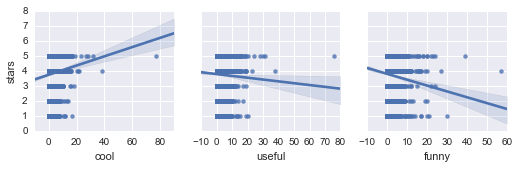

In [24]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [54]:
# create X and y
X = yelp[feature_cols]
y = yelp.stars



## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [55]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.intercept_
print linreg.coef_


3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [56]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np



In [82]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) #
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [83]:
# calculate RMSE with all three features
print train_test_rmse(feature_cols)

1.17336862742


## Task 6

Try removing some of the features and see if the RMSE improves.

In [60]:
print train_test_rmse(['cool','funny'])

1.20864197187


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [61]:
# new feature: 
yelp['char'] = yelp['text'].str.len()
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,char
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895


In [70]:
# new features: 
yelp['user_freq'] = yelp.groupby('user_id')['user_id'].transform('count')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,char,user_freq
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895,15


In [86]:
# add new features to the model and calculate RMSE
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

feature_cols2 = ['cool','useful','funny','char','user_freq']
def train_test_rmse2(feature_cols2):
    X = yelp[feature_cols2]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123 ) #removed  
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    


In [87]:
print train_test_rmse2(feature_cols2)

1.16668590567


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,)
y_null = np.zeros_like(y_test, dtype=float)

y_null.fill(y_test.mean())
y_null
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2162431335880175